# SYS 611: Arrival Process Generator (Continuous IVT)

Paul T. Grogan <pgrogan@stevens.edu>

This example shows how to create a continuous proces generator using the inverse transform method.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy`, `matplotlib.pyplot`, and `scipy.stats` libraries.

In [4]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy package and refer to it as `np`
# see http://docs.scipy.org/doc/numpy/reference/ for documentation
import numpy as np

# import the matplotlib pyplot package and refer to it as `plt`
# see http://matplotlib.org/api/pyplot_api.html for documentation
import matplotlib.pyplot as plt

# import the scipy stats package and refer to it as `stats`
# see http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html for docs
import scipy.stats as stats

## Source Distribution

This process generator will generate new inter-arrival periods (i.e., times between customers) based on an exponential distribution with rate parameter `_lambda=0.5` customers per minute (i.e., an average of 2 minutes between customers). The

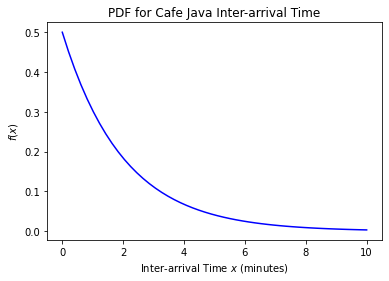

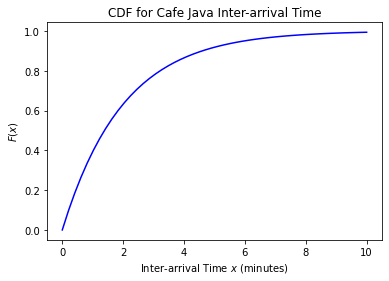

In [15]:
_lambda = 0.5 # customers per minute

# define a linear space between 0 and 10 minutes for random variable values
x = np.linspace(0,10)

# define a PDF from the mathematical distribution formula
pdf = _lambda*np.exp(-_lambda*x)
# note: the PDF can also be computed using a library function
# pdf = stats.expon.pdf(x, scale=1/_lambda)

plt.figure()
plt.plot(x, pdf, '-b')
plt.xlabel('Inter-arrival Time $x$ (minutes)')
plt.ylabel('$f(x)$')
plt.title('PDF for Cafe Java Inter-arrival Time')
plt.show()

# define a CDF from the mathematical distribution formula
cdf = 1-np.exp(-_lambda*x)
# note: the CDF can also be computed using a library function
# cdf = stats.expon.cdf(x, scale=1/_lambda)

plt.figure()
plt.plot(x, cdf, '-b')
plt.xlabel('Inter-arrival Time $x$ (minutes)')
plt.ylabel('$F(x)$')
plt.title('CDF for Cafe Java Inter-arrival Time')
plt.show()

## Process Generator

The inverse transform method uses knowledge of the CDF to generate new samples.


In [13]:
def generate_arrival_ivt():
    """Generates an arrival time following the inverse transform method.
    
    Returns:
        arrival (float): the time until the next arrival    
    """
    r = np.random.rand()
    return -np.log(1-r)/_lambda
    # note: the code above could be replaced with the built-in process generator:
    # return np.random.exponential(1/_lambda)

print('example inter-arrival period: {:.2f} min'.format(generate_arrival_ivt()))

example inter-arrival period: 1.27 min


## Verification Study

A simple verification study can generage a large number of samples (say, 1000) and compare to to the mathematical distribution.

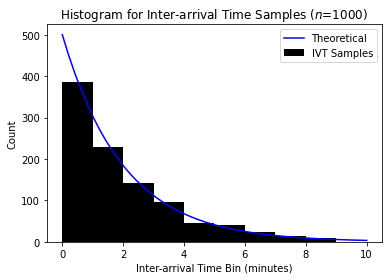

In [19]:
# define number of samples
num_samples = 1000

# fill the samples arrays with samples from the generators
samples_ivt = [generate_arrival_ivt() for i in range(num_samples)]

plt.figure()
plt.hist(samples_ivt, bins=range(10), color='black', label='IVT Samples')
plt.plot(x, pdf*num_samples, '-b', label='Theoretical')
plt.xlabel('Inter-arrival Time Bin (minutes)')
plt.ylabel('Count')
plt.title('Histogram for Inter-arrival Time Samples ($n$={})'.format(num_samples))
plt.legend()
plt.show()